In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [2]:
import pandas as pd
import numpy as np

In [3]:
training_df = pd.read_csv('train/training.csv')
training_df = training_df[training_df['last'] != 0]

In [4]:
train_x = training_df.drop('last', axis=1)
train_x.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
train_y = training_df['last']

In [6]:
train_y = train_y.to_numpy()

In [7]:
np.shape(train_y)

(517,)

In [8]:
train_x = train_x.to_numpy()

In [9]:
test_df = pd.read_csv('test/testing.csv')
test_df = test_df[test_df['last'] != 0]

In [10]:
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
test_y = test_df['last'].to_numpy()

In [12]:
# create a discretized state vector for each 25 cent increment
# array positions (>=.75, .5-.75,.25-.5,0-.25, -.25-0, -.5--.25, -.75 - -.5, <= -.75)
def convert_to_vec(listy):
    ret_list = np.ndarray((len(listy), 8))
    for i, y in enumerate(listy):
        if y > 0:
            if y <= 0.25:
                ret_list[i] = np.array([0,0,0,1,0,0,0,0])
            elif y <= 0.5:
                ret_list[i] = np.array([0,0,1,0,0,0,0,0])
            elif y < 0.75:
                ret_list[i] = np.array([0,1,0,0,0,0,0,0])
            else:
                ret_list[i] = np.array([1,0,0,0,0,0,0,0])
        else:
            if y >= -0.25:
                ret_list[i] = np.array([0,0,0,0,1,0,0,0])
            elif y >= -0.5:
                ret_list[i] = np.array([0,0,0,0,0,1,0,0])
            elif y > -0.75:
                ret_list[i] = np.array([0,0,0,0,0,0,1,0])
            else:
                ret_list[i] = np.array([0,0,0,0,0,0,0,1])
    return ret_list

In [13]:
test_y = convert_to_vec(test_y)
train_y = convert_to_vec(train_y)

In [14]:
test_x = test_df.drop(columns=['last']).to_numpy()

We now have cleaned NP arrays for our training and testing inputs and outputs, so we begin constructing a Keras model.

In [15]:
model = keras.Sequential()
model.add(keras.Input(shape=(20,)))
model.add(layers.Dense(15, name="hidden1", activation='relu')) 

model.add(layers.Dense(8, name="output", activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 15)                315       
                                                                 
 output (Dense)              (None, 8)                 128       
                                                                 
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


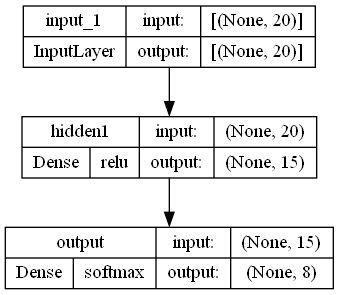

In [16]:
keras.utils.plot_model(
    model,
    to_file="model2.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [17]:
# reserve ~10% for inter-epoch validation
val_x = train_x[-50:]
val_y = train_y[-50:]
train_x = train_x[:-50]
train_y = train_y[:-50]


In [18]:
model.compile(
    optimizer=keras.optimizers.SGD(), # stoch grad descent
    loss=keras.losses.MeanSquaredError(), # MSE loss function to minimize
    metrics=[keras.metrics.Accuracy()],
)

In [19]:
session = model.fit(
    train_x,
    train_y,
    batch_size=25,
    epochs=100, 
    validation_data=(val_x, val_y),
)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.1108 - accuracy: 0.0000e+00 - val_loss: 0.1100 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.0000e+00 - val_loss: 0.1099 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.1107 - accuracy: 0.0000e+00 - val_loss: 0.1098 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1106 - accuracy: 0.0000e+00 - val_loss: 0.1098 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.0000e+00 - val_loss: 0.1097 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.0000e+00 - val_loss: 0.1096 - val_accuracy: 0.0000e+00
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1104 - accuracy: 0.0000e+00 - 

In [20]:
session.history

{'loss': [0.11079481244087219,
  0.11072605848312378,
  0.11065738648176193,
  0.1105886921286583,
  0.11051978170871735,
  0.110450878739357,
  0.11038190126419067,
  0.11031300574541092,
  0.11024400591850281,
  0.11017492413520813,
  0.11010590940713882,
  0.11003682762384415,
  0.10996786504983902,
  0.10989902168512344,
  0.10983014851808548,
  0.10976125299930573,
  0.10969228297472,
  0.1096232607960701,
  0.1095542386174202,
  0.10948526114225388,
  0.10941644757986069,
  0.10934747755527496,
  0.10927815735340118,
  0.10920906811952591,
  0.10913974046707153,
  0.10907061398029327,
  0.10900143533945084,
  0.10893236100673676,
  0.1088632121682167,
  0.1087937206029892,
  0.1087244525551796,
  0.1086554154753685,
  0.10858602821826935,
  0.108516626060009,
  0.10844743251800537,
  0.10837806761264801,
  0.108308807015419,
  0.10823915153741837,
  0.10816983878612518,
  0.10810025036334991,
  0.1080305203795433,
  0.10796092450618744,
  0.10789089649915695,
  0.1078211665153503

In [21]:
results = model.evaluate(test_x, test_y, batch_size=100)
print("test loss, test acc:", results)

3/3 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.0000e+00
test loss, test acc: [0.10288359224796295, 0.0]


In [22]:
predictions = model.predict(test_x)

9/9 [==============================] - 0s 2ms/step


In [23]:
direction_success = 0
for i, pred in enumerate(predictions):
    pred_index = np.argmax(pred)
    test_index = np.argmax(test_y[i])
    if pred_index <= 3  and test_index <= 3:
        direction_success += 1
    elif pred_index > 3 and test_index > 3:
        direction_success += 1


In [24]:
# compute accuracy of the direction of travel
direction_success / len(test_y)

0.48507462686567165

In [25]:
# compute accuracy within one tick (0.25)
tick_success = 0
for i, pred in enumerate(predictions):
    pred_index = np.argmax(pred)
    test_index = np.argmax(test_y[i])
    if pred_index == test_index:
        tick_success += 1

In [26]:
tick_success / len(test_y)

0.4552238805970149

In [32]:
import matplotlib.pyplot as plt

bar_names = [
    "Model 1 Direction", 
    "Model 1 Magnitude", 
    "Model 2 Direction", 
    "Model 2 Magnitude", 
    "Model 3 Direction", 
    "Model 3 Magnitude",]
bar_heights = [
    0.915,
    0.911, 
    0.515,
    0.481, 
    0.485, 
    0.455, 
]

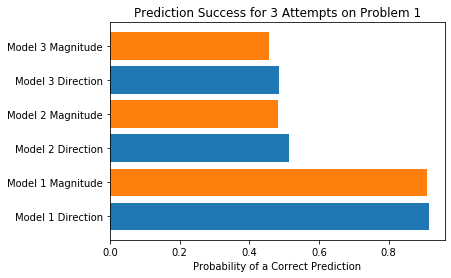

In [41]:
import matplotlib.colors as mcolors

plt.barh(bar_names, bar_heights, color=['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange', 'tab:blue', 'tab:orange'])
plt.title('Prediction Success for 3 Attempts on Problem 1')
plt.xlabel('Probability of a Correct Prediction')
plt.savefig('model1attempts.png', dpi=300, bbox_inches='tight')